In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.neural_network import MLPClassifier
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interactive

In [11]:
# Generating synthetic data for circles
X, y = make_circles(n_samples=1000, noise= 0.2, factor=0.25, random_state=0)

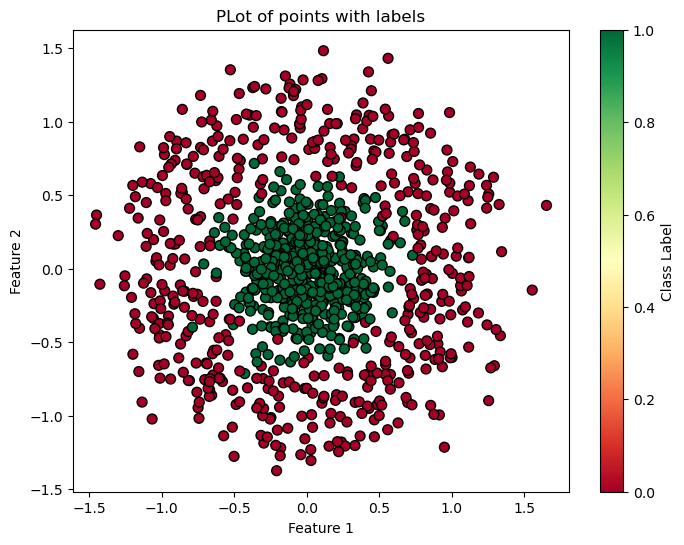

In [12]:
# Plotting the points with labels
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlGn, edgecolors = 'k', marker='o', s=50)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("PLot of points with labels")
plt.colorbar(label="Class Label")
plt.show()

In [13]:
def update_plot(hidden_layer_size):
    #creating a MLP classifier
    clf = MLPClassifier(hidden_layer_sizes=(hidden_layer_size,),activation='relu', max_iter=3000, random_state=1)
    #fitting the classifier to the data
    clf.fit(X,y)

    x_vals = np.linspace(X[:, 0].min()-0.1, X[:, 0].max() + 0.1, 100)
    y_vals = np.linspace(X[:, 1].min()-0.1, X[:, 1].max() + 0.1, 100)

    X_plane, Y_plane = np.meshgrid(x_vals,y_vals)
    grid_points = np.column_stack((X_plane.ravel(), Y_plane.ravel()))
    
    Z = clf.predict(grid_points)
    Z = Z.reshape(X_plane.shape)

    y_pred = clf.predict(X)
    
    plt.clf()

    plt.contourf(X_plane, Y_plane, Z, levels=[-0.5, 0.5, 1.5], cmap=plt.cm.RdYlGn, alpha=0.6)

    class_0 = y_pred == 0
    class_1 = y_pred == 1

    plt.scatter(X[class_0, 0], X[class_0, 1], c='red', edgecolors='k', marker='o', s=50, label='Predicted class 0')
    plt.scatter(X[class_1, 0], X[class_1, 1], c='green', edgecolors='k', marker='o', s=50, label='Predicted class 1')

    #Adding labels and title 
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision boundary and predicted labels (Hidden layer size={hidden_layer_size})')
    plt.legend()
    plt.show()

hidden_layer_size_slider = widgets.IntSlider(value=1, min=1, max=10, step=1)

interactive_plot = interactive(update_plot, hidden_layer_size=hidden_layer_size_slider)
display(interactive_plot)


interactive(children=(IntSlider(value=1, description='hidden_layer_size', max=10, min=1), Output()), _dom_clas…